In [25]:
#Libraries to Import:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


plt.rcParams['figure.figsize'] = [15, 6]

import warnings
warnings.filterwarnings("ignore")


from sklearn.model_selection import train_test_split
import statsmodels.stats.api as ssa
import statsmodels.api as sma
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder


from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

import statsmodels.api as sma

#pd.options.display.max_rows = None

pd.options.display.max_columns = None

pd.options.display.float_format = '{:0.6f}'.format

In [26]:
df=pd.read_csv('Housing.csv')
df.head()

price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished

In [27]:
df.shape

(545, 13)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [29]:
df.describe().T

count           mean            std            min  \
price     545.000000 4766729.247706 1870439.615657 1750000.000000   
area      545.000000    5150.541284    2170.141023    1650.000000   
bedrooms  545.000000       2.965138       0.738064       1.000000   
bathrooms 545.000000       1.286239       0.502470       1.000000   
stories   545.000000       1.805505       0.867492       1.000000   
parking   545.000000       0.693578       0.861586       0.000000   

                     25%            50%            75%             max  
price     3430000.000000 4340000.000000 5740000.000000 13300000.000000  
area         3600.000000    4600.000000    6360.000000    16200.000000  
bedrooms        2.000000       3.000000       3.000000        6.000000  
bathrooms       1.000000       1.000000       2.000000        4.000000  
stories         1.000000       2.000000       2.000000        4.000000  
parking         0.000000       0.000000       1.000000        3.000000

In [30]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [31]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

# Performing EDA

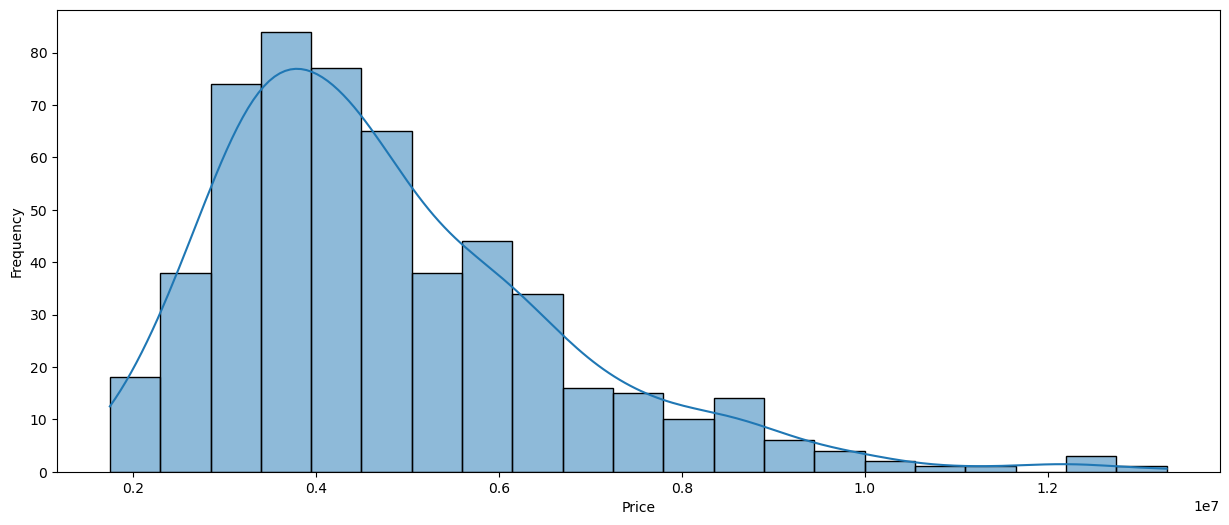

In [32]:
sns.histplot(df['price'],kde=True)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

Most of the house price are in the price range between 20,00,000 to 70,00,000

Some of the outliers are above 1 crore which is at the right tail

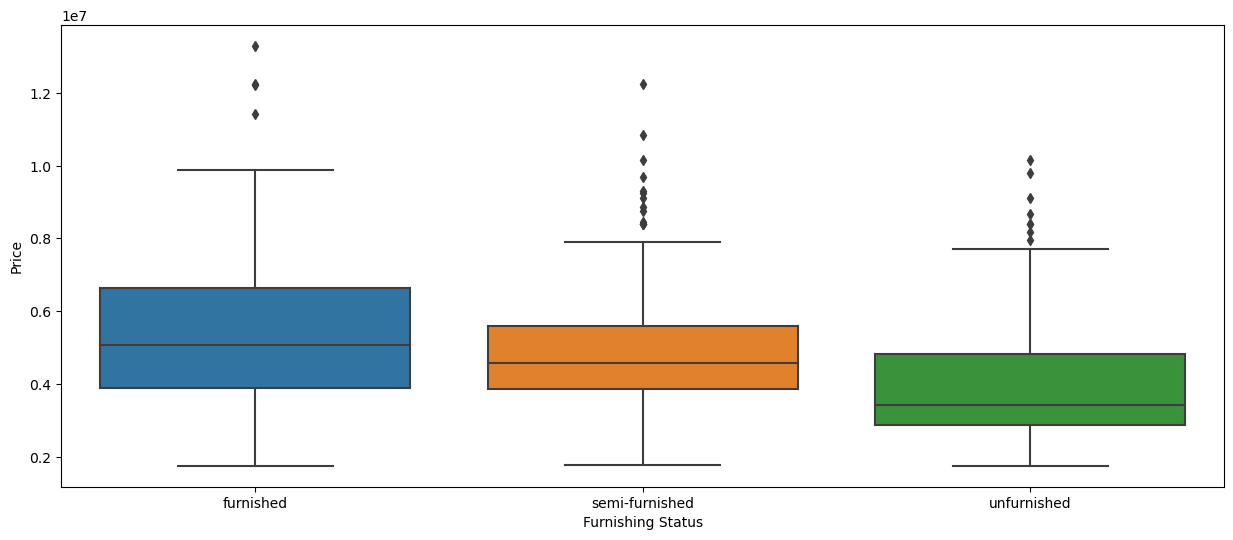

In [33]:
sns.boxplot(x='furnishingstatus', y='price', data=df)
plt.xlabel('Furnishing Status')
plt.ylabel('Price')
plt.show()

50% of the furnished house prices are between 40 lakhs and 65 lakhs.
50% of the semi-furnished house prices are between 40 lakhs and 50 lakhs.
50% of the unfurnished house prices are between 30 lakhs and 45 lakhs.

Most of the extreme outliers are seen in semi_furnished.

In [34]:
sns.regplot(data=df,x='area', y='price', scatter=True, color='green', line_kws={"color": "red"})
plt.show()

Here as the 
area increases the price also increases. So we assume there is a relation between area and price

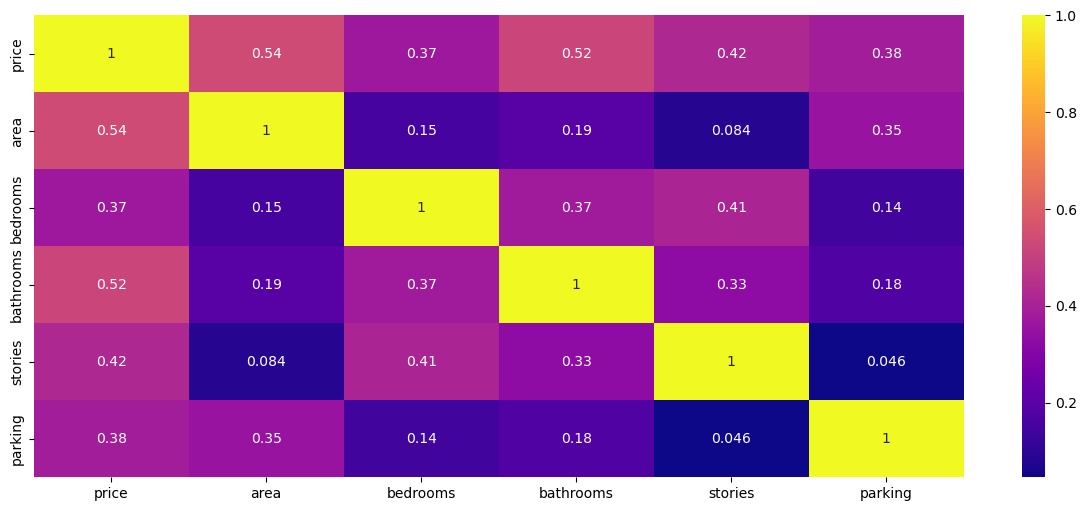

In [35]:
sns.heatmap(df.corr(),annot=True,cmap='plasma')
plt.show()

There is normal correlation among price, area and bathrooms.

Other have less correlation

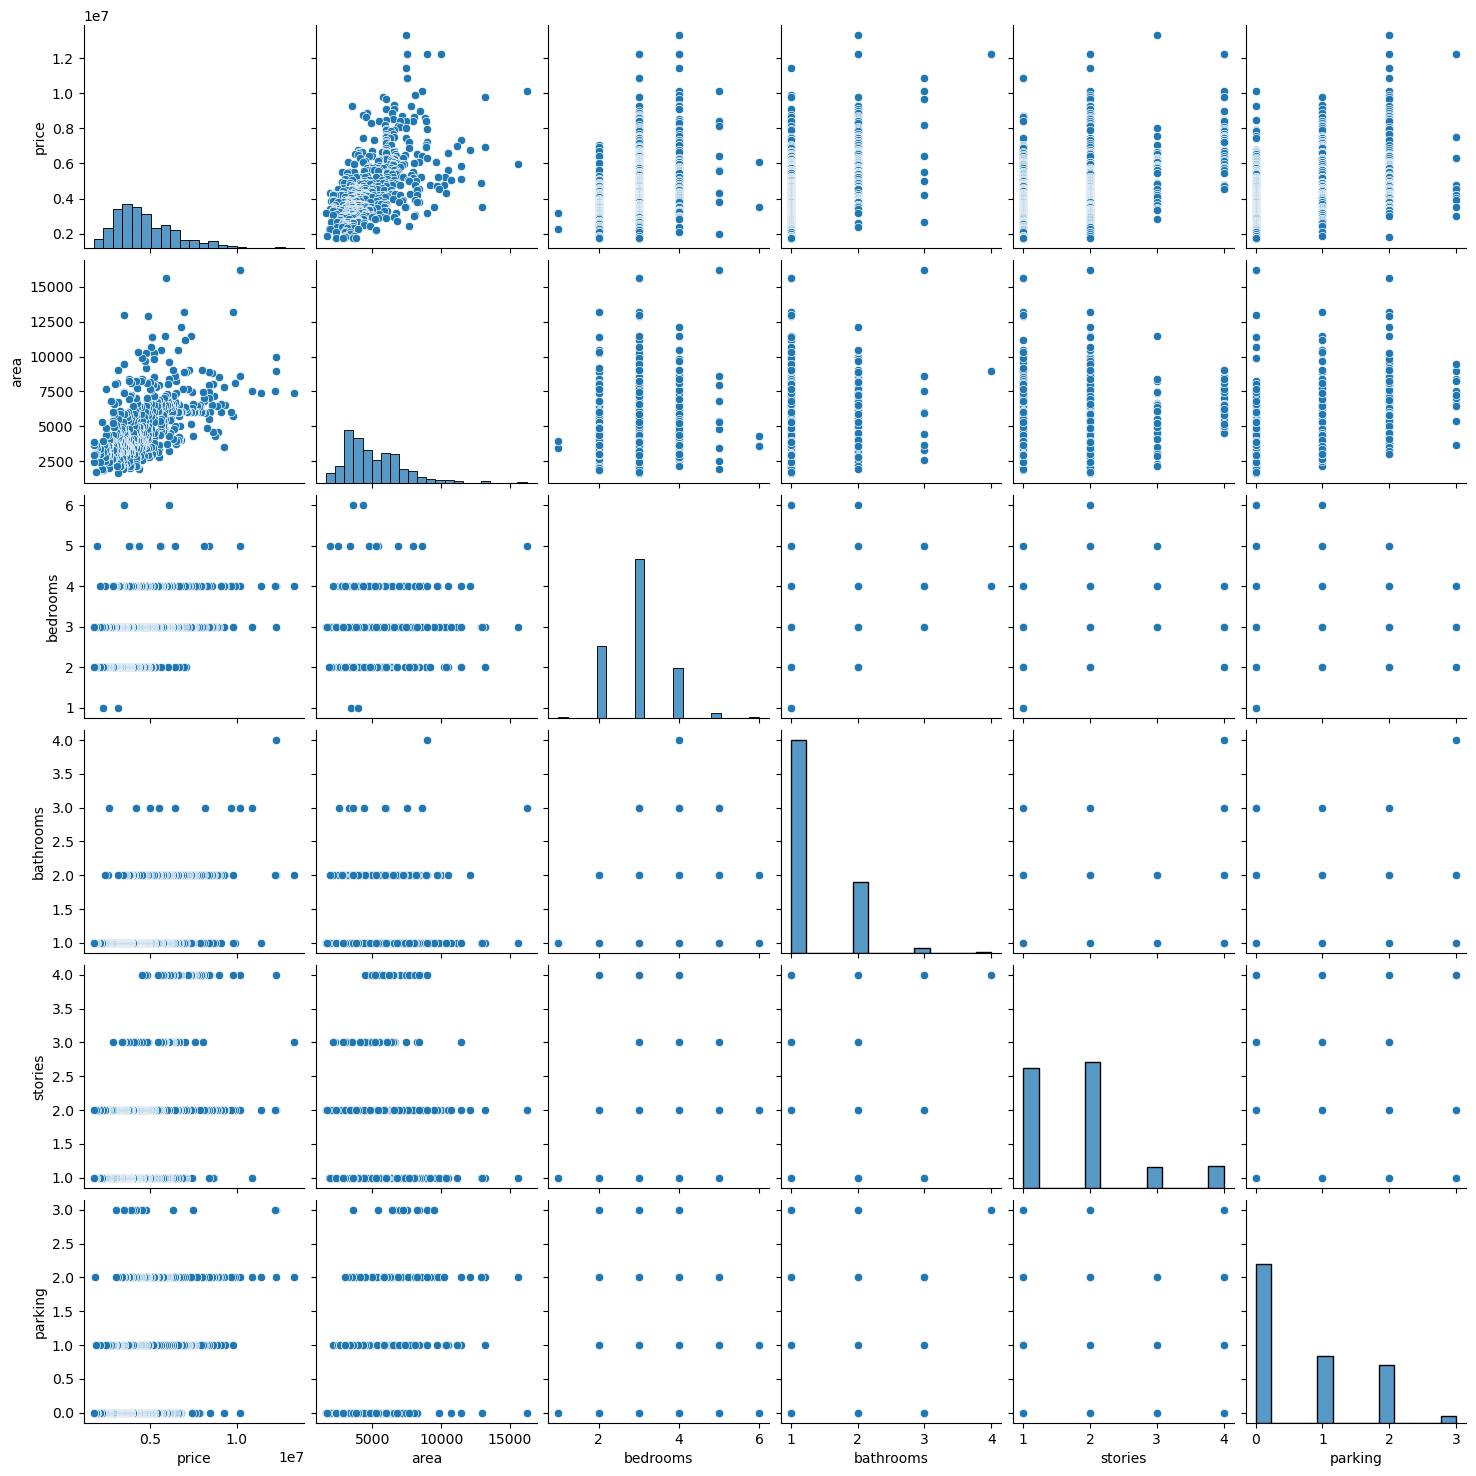

In [36]:
sns.pairplot(df)
plt.show()

# Data Cleaning and Preparation

In [37]:
df_cat=df.select_dtypes(include='object')
df_num=df.select_dtypes(include=np.number)

In [38]:
print(df_num.shape)
print(df_cat.shape)

(545, 6)
(545, 7)


In [39]:
dummy = pd.get_dummies(df_cat.drop(['furnishingstatus'], axis=1), drop_first=True)


In [40]:
dummy

mainroad_yes  guestroom_yes  basement_yes  hotwaterheating_yes  \
0               1              0             0                    0   
1               1              0             0                    0   
2               1              0             1                    0   
3               1              0             1                    0   
4               1              1             1                    0   
..            ...            ...           ...                  ...   
540             1              0             1                    0   
541             0              0             0                    0   
542             1              0             0                    0   
543             0              0             0                    0   
544             1              0             0                    0   

     airconditioning_yes  prefarea_yes  
0                      1             1  
1                      1             0  
2                      0             1  
3                      1             1  
4                      1             0  
..                   ...           ...  
540                    0             0  
541                    0             0  
542                    0             0  
543                    0             0  
544                    0             0  

[545 rows x 6 columns]

In [41]:
df['furnishingstatus'].value_counts()

semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64

In [42]:
oe = OrdinalEncoder()
dummy['furnishingstatus_encoded'] = oe.fit_transform(df_cat[['furnishingstatus']])


In [43]:
dummy

mainroad_yes  guestroom_yes  basement_yes  hotwaterheating_yes  \
0               1              0             0                    0   
1               1              0             0                    0   
2               1              0             1                    0   
3               1              0             1                    0   
4               1              1             1                    0   
..            ...            ...           ...                  ...   
540             1              0             1                    0   
541             0              0             0                    0   
542             1              0             0                    0   
543             0              0             0                    0   
544             1              0             0                    0   

     airconditioning_yes  prefarea_yes  furnishingstatus_encoded  
0                      1             1                  0.000000  
1                      1             0                  0.000000  
2                      0             1                  1.000000  
3                      1             1                  0.000000  
4                      1             0                  0.000000  
..                   ...           ...                       ...  
540                    0             0                  2.000000  
541                    0             0                  1.000000  
542                    0             0                  2.000000  
543                    0             0                  0.000000  
544                    0             0                  2.000000  

[545 rows x 7 columns]

In [44]:
df_num

price  area  bedrooms  bathrooms  stories  parking
0    13300000  7420         4          2        3        2
1    12250000  8960         4          4        4        3
2    12250000  9960         3          2        2        2
3    12215000  7500         4          2        2        3
4    11410000  7420         4          1        2        2
..        ...   ...       ...        ...      ...      ...
540   1820000  3000         2          1        1        2
541   1767150  2400         3          1        1        0
542   1750000  3620         2          1        1        0
543   1750000  2910         3          1        1        0
544   1750000  3850         3          1        2        0

[545 rows x 6 columns]

In [45]:
df_final=pd.concat([df_num,dummy],axis=1)

In [46]:
df_final

price  area  bedrooms  bathrooms  stories  parking  mainroad_yes  \
0    13300000  7420         4          2        3        2             1   
1    12250000  8960         4          4        4        3             1   
2    12250000  9960         3          2        2        2             1   
3    12215000  7500         4          2        2        3             1   
4    11410000  7420         4          1        2        2             1   
..        ...   ...       ...        ...      ...      ...           ...   
540   1820000  3000         2          1        1        2             1   
541   1767150  2400         3          1        1        0             0   
542   1750000  3620         2          1        1        0             1   
543   1750000  2910         3          1        1        0             0   
544   1750000  3850         3          1        2        0             1   

     guestroom_yes  basement_yes  hotwaterheating_yes  airconditioning_yes  \
0                0             0                    0                    1   
1                0             0                    0                    1   
2                0             1                    0                    0   
3                0             1                    0                    1   
4                1             1                    0                    1   
..             ...           ...                  ...                  ...   
540              0             1                    0                    0   
541              0             0                    0                    0   
542              0             0                    0                    0   
543              0             0                    0                    0   
544              0             0                    0                    0   

     prefarea_yes  furnishingstatus_encoded  
0               1                  0.000000  
1               0                  0.000000  
2               1                  1.000000  
3               1                  0.000000  
4               0                  0.000000  
..            ...                       ...  
540             0                  2.000000  
541             0                  1.000000  
542             0                  2.000000  
543             0                  0.000000  
544             0                  2.000000  

[545 rows x 13 columns]


# Base Model

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

In [48]:

X = df_final.drop('price',axis=1)

y = df_final['price']

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.7,random_state = 100)

lr = LinearRegression()

lr_bm=lr.fit(X_train,y_train)

pred_test = lr_bm.predict(X_test)

pred_train = lr_bm.predict(X_train)

mse = np.sqrt(mean_squared_error(y_true=y_test,y_pred=pred_test))

r2Score_test = r2_score(y_true=y_test,y_pred=pred_test)

r2Score_train = r2_score(y_true=y_train,y_pred=pred_train)

accuracy = lr.score(X_train,y_train)*100

print('r2_score_test : ',r2Score_test,'\n')

print('r2_score_train : ',r2Score_train,'\n')

print('RMSE : ',mse,'\n')

print('Accuarcy of the test result',accuracy )

r2_score_test :  0.6728084275060378 

r2_score_train :  0.6789071362424812 

RMSE :  1133383.4668633942 

Accuarcy of the test result 67.89071362424812


# Building the multiple linear regression model using OLS Method

In [49]:


# to estimate the regression coefficient, a constant term of '1' needs to be added as a separate column
# 'sm.add_constant' adds the intercept to the model
temp_X = sma.add_constant(X)

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train,X_test,y_train,y_test = train_test_split(temp_X, y, random_state=1, test_size = 0.2)

# checking the dimensions of the train & test subset
# print dimension of train set
print('X_train_inter', X_train.shape)
print('y_train_inter', y_train.shape)

# print dimension of test set
print('X_test_inter', X_test.shape)
print('y_test_inter', y_test.shape)

X_train_inter (436, 13)
y_train_inter (436,)
X_test_inter (109, 13)
y_test_inter (109,)


In [50]:
MLR_model = sma.OLS(y_train, X_train).fit()

print(MLR_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     80.19
Date:                Thu, 24 Aug 2023   Prob (F-statistic):          6.66e-101
Time:                        21:06:49   Log-Likelihood:                -6644.9
No. Observations:                 436   AIC:                         1.332e+04
Df Residuals:                     423   BIC:                         1.337e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

The Durbin-Watson test is used to check the autocorrelation between the residuals.
between 2 and 4: negative autocorrelation

The Jarque-Bera test is used to check the normality of the residuals.
the p-value of the test is less than 0.05; that implies the residuals are not normally distributed.


The 'Cond. No' (1.5e+05) represents the Condition Number (CN) which is used to check the multicollinearity
If CN > 1000: severe multicollinearity

Thus, it can be seen that there is severe multicollinearity in the data

In [51]:
from sklearn.preprocessing import MinMaxScaler

In [52]:
mm=MinMaxScaler()
df_scaled_mm=mm.fit_transform(df_num)
df_scaled=pd.DataFrame(df_scaled_mm,columns=df_num.columns.to_list())

In [53]:
df_sf_BM1=pd.concat([dummy,df_scaled],axis=1) #scaled_final
df_sf_BM1.head()

mainroad_yes  guestroom_yes  basement_yes  hotwaterheating_yes  \
0             1              0             0                    0   
1             1              0             0                    0   
2             1              0             1                    0   
3             1              0             1                    0   
4             1              1             1                    0   

   airconditioning_yes  prefarea_yes  furnishingstatus_encoded    price  \
0                    1             1                  0.000000 1.000000   
1                    1             0                  0.000000 0.909091   
2                    0             1                  1.000000 0.909091   
3                    1             1                  0.000000 0.906061   
4                    1             0                  0.000000 0.836364   

      area  bedrooms  bathrooms  stories  parking  
0 0.396564  0.600000   0.333333 0.666667 0.666667  
1 0.502405  0.600000   1.000000 1.000000 1.000000  
2 0.571134  0.400000   0.333333 0.333333 0.666667  
3 0.402062  0.600000   0.333333 0.333333 1.000000  
4 0.396564  0.600000   0.000000 0.333333 0.666667

In [54]:

X = df_sf_BM1.drop('price',axis=1)

y = df_sf_BM1['price']

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.7,random_state = 100)

lr = LinearRegression()

lr_bm=lr.fit(X_train,y_train)

pred_test = lr_bm.predict(X_test)

pred_train = lr_bm.predict(X_train)

mse = np.sqrt(mean_squared_error(y_true=y_test,y_pred=pred_test))

r2Score_test = r2_score(y_true=y_test,y_pred=pred_test)

r2Score_train = r2_score(y_true=y_train,y_pred=pred_train)

accuracy = lr.score(X_train,y_train)*100

print('r2_score_test : ',r2Score_test,'\n')

print('r2_score_train : ',r2Score_train,'\n')

print('RMSE : ',mse,'\n')

print('Accuarcy of the test result',accuracy )

r2_score_test :  0.6728084275060373 

r2_score_train :  0.6789071362424813 

RMSE :  0.09812843868947146 

Accuarcy of the test result 67.89071362424814


# OLS Transform

In [55]:
X = df_sf_BM1.drop('price',axis=1)

y = df_sf_BM1['price']

temp_X = sma.add_constant(X)

X_train,X_test,y_train,y_test = train_test_split(temp_X, y, random_state=1, test_size = 0.2)

In [56]:
model_sqrt = sma.OLS(np.sqrt(y_train), X_train).fit() #sqr root

model_cbrt = sma.OLS(np.cbrt(y_train), X_train).fit() #cube root transformation

model_log = sma.OLS(np.log(y_train), X_train).fit() #log trans

model_yojh = sma.OLS(stats.yeojohnson(y_train)[0], X_train).fit() #ytojohnson



In [57]:
transf_score = pd.DataFrame(columns=['Transformation',
                                     'R_Squared',
                                      'Adj Rsquared' ]
                                  )


def update_transformation (name,
                           model
                           ):

    # assign 'comp_perf' as global variable
    global transf_score


    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    transf_score = transf_score.append({'Transformation'    : name,
                                        'R_Squared'         : model.rsquared,
                                        'Adj Rsquared'    : model.rsquared_adj
                                    },
                                   ignore_index = True)

In [58]:
update_transformation(name = "Square Root", model = model_sqrt)
update_transformation(name = "Cube Root", model = model_cbrt)
update_transformation(name = "Yeo Johnson", model = model_yojh)

In [59]:
transf_score

Transformation  R_Squared  Adj Rsquared
0    Square Root   0.691643      0.682895
1      Cube Root   0.648525      0.638554
2    Yeo Johnson   0.704035      0.695638

In [60]:
def get_train_rmse(model):
    
    train_pred = model.predict(X_train)

    mse_train = mean_squared_error(y_train, train_pred)

    rmse_train = round(np.sqrt(mse_train), 4)
    
    return(rmse_train)

In [61]:

def get_test_rmse(model):
    
    test_pred = model.predict(X_test)

    mse_test = mean_squared_error(y_test, test_pred)

    rmse_test = round(np.sqrt(mse_test), 4)

    return(rmse_test)

In [62]:
def mape(actual, predicted):
    return (np.mean(np.abs((actual - predicted) / actual)) * 100)

def get_test_mape(model):
    
    test_pred = model.predict(X_test)
    
    mape_test = mape(y_test, test_pred)

    # return the MAPE for the test set
    return(mape_test)

In [63]:
def get_score(model):
    
    r_sq = model.score(X_train, y_train)
     
    n = X_train.shape[0]
    
    k = X_train.shape[1]
    
    r_sq_adj = 1 - ((1-r_sq)*(n-1)/(n-k-1))
     
    return ([r_sq, r_sq_adj])

In [64]:
score_card = pd.DataFrame(columns=['Model_Name', 'Alpha (Wherever Required)', 'l1-ratio', 'R-Squared',
                                       'Adj. R-Squared', 'Test_RMSE', 'Test_MAPE'])

def update_score_card(algorithm_name, model, alpha = '-', l1_ratio = '-'):
    
    global score_card

    score_card = score_card.append({'Model_Name': algorithm_name,
                       'Alpha (Wherever Required)': alpha, 
                       'l1-ratio': l1_ratio, 
                       'Test_MAPE': get_test_mape(model), 
                       'Test_RMSE': get_test_rmse(model), 
                       'R-Squared': get_score(model)[0], 
                       'Adj. R-Squared': get_score(model)[1]}, ignore_index = True)

In [65]:
linreg = LinearRegression()

MLR_model = linreg.fit(X_train, y_train)

MLR_model.score(X_train, y_train)

0.6946575070270329

In [66]:
print('RMSE on train set: ', get_train_rmse(MLR_model))

print('RMSE on test set: ', get_test_rmse(MLR_model))

difference = abs(get_test_rmse(MLR_model) - get_train_rmse(MLR_model))

print('Difference between RMSE on train and test set: ', difference)

RMSE on train set:  0.0871
RMSE on test set:  0.1096
Difference between RMSE on train and test set:  0.022500000000000006


In [67]:
update_score_card(algorithm_name = 'Linear Regression', model = MLR_model)

score_card

Model_Name Alpha (Wherever Required) l1-ratio  R-Squared  \
0  Linear Regression                         -        -   0.694658   

   Adj. R-Squared  Test_RMSE  Test_MAPE  
0        0.685251   0.109600  70.104636

In [69]:
ridge = Ridge(alpha = 1, max_iter = 500)

ridge.fit(X_train, y_train)

print('RMSE on test set:', get_test_rmse(ridge))

RMSE on test set: 0.1096


In [70]:
update_score_card(algorithm_name='Ridge Regression (with alpha = 1)', model = ridge, alpha = 1)

score_card

Model_Name Alpha (Wherever Required) l1-ratio  \
0                  Linear Regression                         -        -   
1  Ridge Regression (with alpha = 1)                         1        -   

   R-Squared  Adj. R-Squared  Test_RMSE  Test_MAPE  
0   0.694658        0.685251   0.109600  70.104636  
1   0.693499        0.684057   0.109600  71.320018

In [71]:
ridge = Ridge(alpha = 2, max_iter = 500)

ridge.fit(X_train, y_train)

print('RMSE on test set:', get_test_rmse(ridge))

RMSE on test set: 0.1098


In [72]:
lasso = Lasso(alpha = 0.01, max_iter = 500)

lasso.fit(X_train, y_train)

print('RMSE on test set:', get_test_rmse(lasso))

RMSE on test set: 0.1353


In [74]:
df_lasso_coeff = pd.DataFrame({'Variable': df_sf_BM1.columns, 'Coefficient': lasso.coef_})

print('Insignificant variables obtained from Lasso Regression when alpha is 0.01')
df_lasso_coeff.Variable[df_lasso_coeff.Coefficient == 0].to_list()

Insignificant variables obtained from Lasso Regression when alpha is 0.01


['mainroad_yes', 'airconditioning_yes', 'area', 'bedrooms']

In [75]:
update_score_card(algorithm_name = 'Lasso Regression', model = lasso, alpha = '0.01')

score_card

Model_Name Alpha (Wherever Required) l1-ratio  \
0                  Linear Regression                         -        -   
1  Ridge Regression (with alpha = 1)                         1        -   
2                   Lasso Regression                      0.01        -   

   R-Squared  Adj. R-Squared  Test_RMSE  Test_MAPE  
0   0.694658        0.685251   0.109600  70.104636  
1   0.693499        0.684057   0.109600  71.320018  
2   0.413685        0.395623   0.135300 101.017917

In [76]:
enet = ElasticNet(alpha = 0.1, l1_ratio = 0.01, max_iter = 500)

enet.fit(X_train, y_train)

print('RMSE on test set:', get_test_rmse(enet))

RMSE on test set: 0.1256


In [77]:
update_score_card(algorithm_name = 'Elastic Net Regression', model = enet, alpha = '0.1', l1_ratio = '0.01')

score_card

Model_Name Alpha (Wherever Required) l1-ratio  \
0                  Linear Regression                         -        -   
1  Ridge Regression (with alpha = 1)                         1        -   
2                   Lasso Regression                      0.01        -   
3             Elastic Net Regression                       0.1     0.01   

   R-Squared  Adj. R-Squared  Test_RMSE  Test_MAPE  
0   0.694658        0.685251   0.109600  70.104636  
1   0.693499        0.684057   0.109600  71.320018  
2   0.413685        0.395623   0.135300 101.017917  
3   0.537424        0.523174   0.125600  91.259148

In [78]:

tuned_paramaters = [{'alpha':[1e-15, 1e-10, 1e-8, 1e-4,1e-3, 1e-2, 0.1, 1, 5, 10, 20, 40, 60, 80, 100]}]

ridge = Ridge()

ridge_grid = GridSearchCV(estimator = ridge, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

ridge_grid.fit(X_train, y_train)

print('Best parameters for Ridge Regression: ', ridge_grid.best_params_, '\n')

print('RMSE on test set:', get_test_rmse(ridge_grid))

Best parameters for Ridge Regression:  {'alpha': 0.1} 

RMSE on test set: 0.1096


In [79]:
update_score_card(algorithm_name = 'Ridge Regression (using GridSearchCV)', 
                  model = ridge_grid, 
                  alpha = ridge_grid.best_params_.get('alpha'))

score_card

Model_Name Alpha (Wherever Required) l1-ratio  \
0                      Linear Regression                         -        -   
1      Ridge Regression (with alpha = 1)                         1        -   
2                       Lasso Regression                      0.01        -   
3                 Elastic Net Regression                       0.1     0.01   
4  Ridge Regression (using GridSearchCV)                  0.100000        -   

   R-Squared  Adj. R-Squared  Test_RMSE  Test_MAPE  
0   0.694658        0.685251   0.109600  70.104636  
1   0.693499        0.684057   0.109600  71.320018  
2   0.413685        0.395623   0.135300 101.017917  
3   0.537424        0.523174   0.125600  91.259148  
4   0.694643        0.685237   0.109600  70.228583

In [80]:
tuned_paramaters = [{'alpha':[1e-15, 1e-10, 1e-8, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20]}]
                     

lasso = Lasso()

lasso_grid = GridSearchCV(estimator = lasso, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

lasso_grid.fit(X_train, y_train)


print('Best parameters for Lasso Regression: ', lasso_grid.best_params_, '\n')

print('RMSE on test set:', get_test_rmse(lasso_grid))

Best parameters for Lasso Regression:  {'alpha': 0.0001} 

RMSE on test set: 0.1096


In [81]:
update_score_card(algorithm_name = 'Lasso Regression (using GridSearchCV)', 
                  model = lasso_grid, 
                  alpha = lasso_grid.best_params_.get('alpha'))

score_card

Model_Name Alpha (Wherever Required) l1-ratio  \
0                      Linear Regression                         -        -   
1      Ridge Regression (with alpha = 1)                         1        -   
2                       Lasso Regression                      0.01        -   
3                 Elastic Net Regression                       0.1     0.01   
4  Ridge Regression (using GridSearchCV)                  0.100000        -   
5  Lasso Regression (using GridSearchCV)                  0.000100        -   

   R-Squared  Adj. R-Squared  Test_RMSE  Test_MAPE  
0   0.694658        0.685251   0.109600  70.104636  
1   0.693499        0.684057   0.109600  71.320018  
2   0.413685        0.395623   0.135300 101.017917  
3   0.537424        0.523174   0.125600  91.259148  
4   0.694643        0.685237   0.109600  70.228583  
5   0.694614        0.685206   0.109600  70.376362

In [82]:
tuned_paramaters = [{'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20, 40, 60],
                      'l1_ratio':[0.0001, 0.0002, 0.001, 0.01, 0.1, 0.2]}]
  
enet = ElasticNet()


enet_grid = GridSearchCV(estimator = enet, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

enet_grid.fit(X_train, y_train)


print('Best parameters for Elastic Net Regression: ', enet_grid.best_params_, '\n')

print('RMSE on test set:', get_test_rmse(enet_grid))

Best parameters for Elastic Net Regression:  {'alpha': 0.001, 'l1_ratio': 0.0001} 

RMSE on test set: 0.1096


In [83]:
update_score_card(algorithm_name = 'Elastic Net Regression (using GridSearchCV)', 
                  model = enet_grid, 
                  alpha = enet_grid.best_params_.get('alpha'), 
                  l1_ratio = enet_grid.best_params_.get('l1_ratio'))


score_card

Model_Name Alpha (Wherever Required)  \
0                            Linear Regression                         -   
1            Ridge Regression (with alpha = 1)                         1   
2                             Lasso Regression                      0.01   
3                       Elastic Net Regression                       0.1   
4        Ridge Regression (using GridSearchCV)                  0.100000   
5        Lasso Regression (using GridSearchCV)                  0.000100   
6  Elastic Net Regression (using GridSearchCV)                  0.001000   

  l1-ratio  R-Squared  Adj. R-Squared  Test_RMSE  Test_MAPE  
0        -   0.694658        0.685251   0.109600  70.104636  
1        -   0.693499        0.684057   0.109600  71.320018  
2        -   0.413685        0.395623   0.135300 101.017917  
3     0.01   0.537424        0.523174   0.125600  91.259148  
4        -   0.694643        0.685237   0.109600  70.228583  
5        -   0.694614        0.685206   0.109600  70.376362  
6 0.000100   0.694410        0.684996   0.109600  70.638820

In [84]:
score_card = score_card.sort_values('Test_RMSE').reset_index(drop = True)

In [85]:
score_card.style.highlight_min(color = 'lightblue', subset = 'Test_RMSE')